### Project 02: Post-Training Knowledge Assessment
#### Description
This project aims to evaluate the knowledge and skills acquired by GED students following the completion of the training program. . By analyzing both pre-training (entrance scores) and post-training assessment data, we can evaluate the effectiveness of the program in enhancing students' academic abilities and their readiness for the GED exam. Comparing pre- and post-training data will provide insights into individual student growth and the overall impact of the program.

#### Data Points
- Pre-training (entrance) scores
- Post-training assessment scores
- Subject areas covered (math, science, RLA, Social Studies.)
- Student feedback on perceived knowledge gained
- Attendance and participation rates
#### Methodology
- Administer post-training assessments to measure knowledge acquisition after completing the program.
- Collect quantitative/qualitative feedback from students regarding their perceived improvements in knowledge and skills.
- Compare pre- and post-training scores to assess individual and group progress across different subject areas.
- Identify patterns in knowledge growth, and correlate those with attendance, participation rates, and student feedback.
- Use visualizations to present the findings, highlighting any correlations between attendance, participation, and assessment scores.
#### Expected Outcomes
- Comprehensive understanding of knowledge gained by participants, measured by improvements from pre- to post-training.
- Insights into subject areas where students showed significant improvement or encountered challenges.
- Identification of correlations between attendance/participation and academic performance.
- Recommendations for program enhancements based on assessment results and student feedback to improve future training sessions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/pre_post_data_02.csv', index_col = 0)
df_copy = df.drop([col for col in df.columns if 'avg' in col], axis = 1)
df_copy = df_copy.rename(columns = {'n_math_test1':'math_test1'}).sort_index(axis=1)
df_copy.head()

,Pre_Eng,Pre_Math,math_test1,math_test2,math_test3,math_test6,n_ss_test1,n_ss_test2,n_ss_test3,rla_test1,rla_test2,sci_test1,sci_test2,sci_test3,sci_test4
0,6.4,9.0,0.0,9.38,9.62,8.43,6.75,7.23,7.61,6.11,7.56,8.0,7.67,7.34,7.84
1,8.6,8.0,8.8,7.81,8.46,7.69,8.75,7.92,7.27,4.44,7.56,7.0,7.65,8.89,7.11
2,4.6,9.0,8.9,8.13,8.46,8.82,6.75,8.33,7.18,8.33,6.21,8.0,8.82,8.66,7.37
3,5.8,5.0,9.2,8.75,8.46,8.43,8.75,8.10,8.86,8.33,9.31,7.0,10.00,8.27,8.77
4,4.8,6.0,9.8,8.75,7.31,9.22,5.00,7.23,9.32,7.22,7.59,9.0,7.65,8.73,8.07


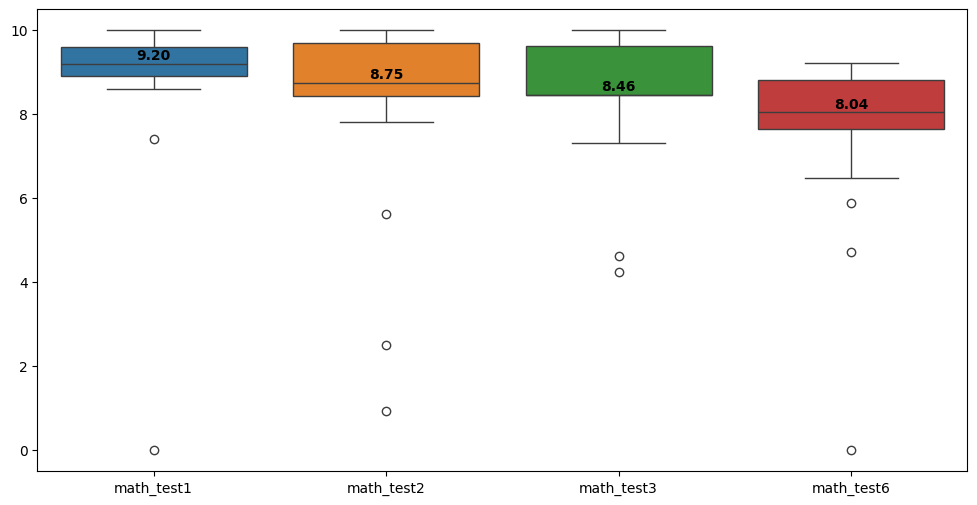

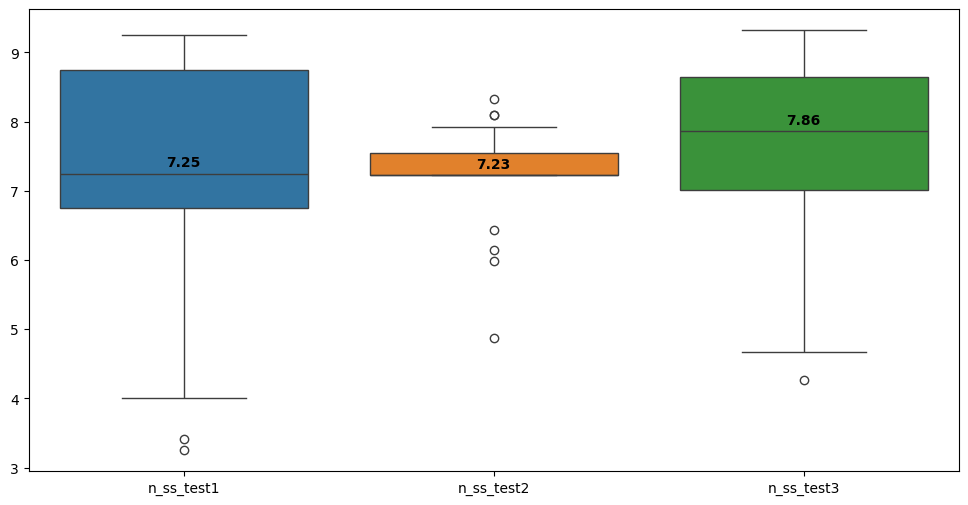

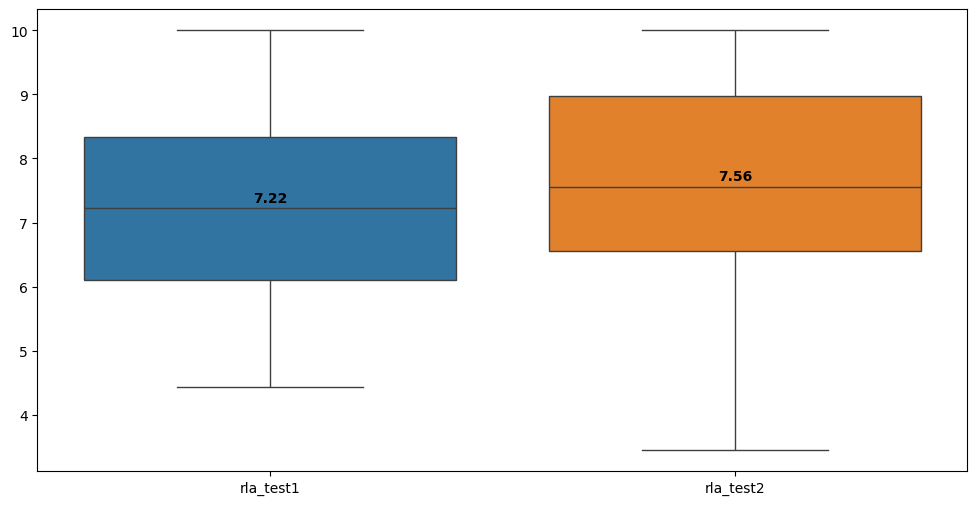

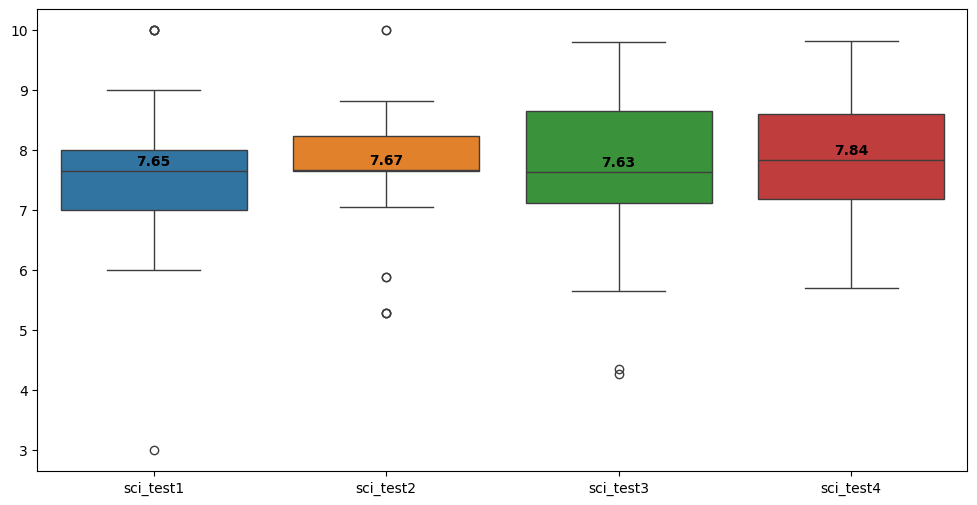

In [3]:
sub_list = ['math', 'ss', 'rla', 'sci']
for sub in sub_list:
    data_cols = [col for col in df_copy.columns if sub in col]
    data = df_copy[data_cols].copy()
    medians = data.median()
    plt.figure(figsize = (12,6))
    ax =sns.boxplot(data=data)
    for xtick, median in zip(ax.get_xticks(), medians):
        ax.text(xtick, median + 0.1, f'{median:.2f}', horizontalalignment='center', color='black', weight='bold')    
    plt.show()

**Insights** The students performed consistently well in their module-end tests. However, we cannot conclusively determine the relationship between pre- and post-training improvements, as these tests are based on module-specific content. Additionally, the students' pre-test does not accurately reflect their knowledge of the GED material; it only measures whether the students are ready for the GED program.

In [4]:
df_avg = df[[col for col in df.columns if 'avg' in col]].copy()
df_avg = pd.merge(df_avg, df[['Pre_Math', 'Pre_Eng']], left_index = True, right_index = True)
cor_matrix = df_avg.corr().iloc[4:6, 0:4]
cor_matrix

,avg_math,avg_rla,avg_sci,avg_ss
Pre_Math,0.008804,0.102762,0.170709,0.182213
Pre_Eng,0.217163,0.243840,0.170308,0.433699


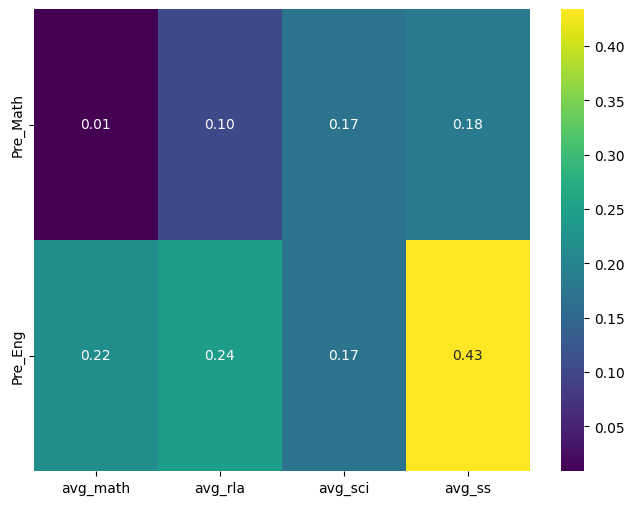

In [5]:
plt.figure(figsize = (8,6))
sns.heatmap(cor_matrix, cmap='viridis', annot=True, fmt='.2f')
plt.show()

**Insights**
- Given that Pre_Eng has a moderate positive correlation with subjects like **RLA and Social Studies**, students' English proficiency helps them perform better during the training. 


In [6]:
df_att = pd.read_csv('./data/attendance.csv', index_col = 0)
df_att[df_att==0] = pd.NA
df_att =df_att.fillna(df_att.mean())

df_att.describe()

,att_rla,att_sci,att_math,att_ss,avg_math,avg_rla,avg_sci,avg_ss
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,95.444444,95.125926,94.207407,93.407692,8.344828,7.291034,7.614483,7.341034
std,5.070738,5.122959,6.593066,7.519352,1.205857,1.615296,1.282182,1.257689
min,81.900000,78.900000,73.700000,72.700000,4.700000,3.940000,3.000000,4.330000
25%,93.600000,93.400000,92.100000,90.900000,8.160000,6.330000,6.860000,6.750000
50%,97.800000,97.400000,96.100000,97.000000,8.670000,7.290000,7.670000,7.580000
75%,98.900000,98.700000,98.700000,98.500000,9.160000,8.650000,8.420000,8.300000
max,100.000000,100.000000,100.000000,100.000000,9.800000,9.830000,10.000000,9.100000


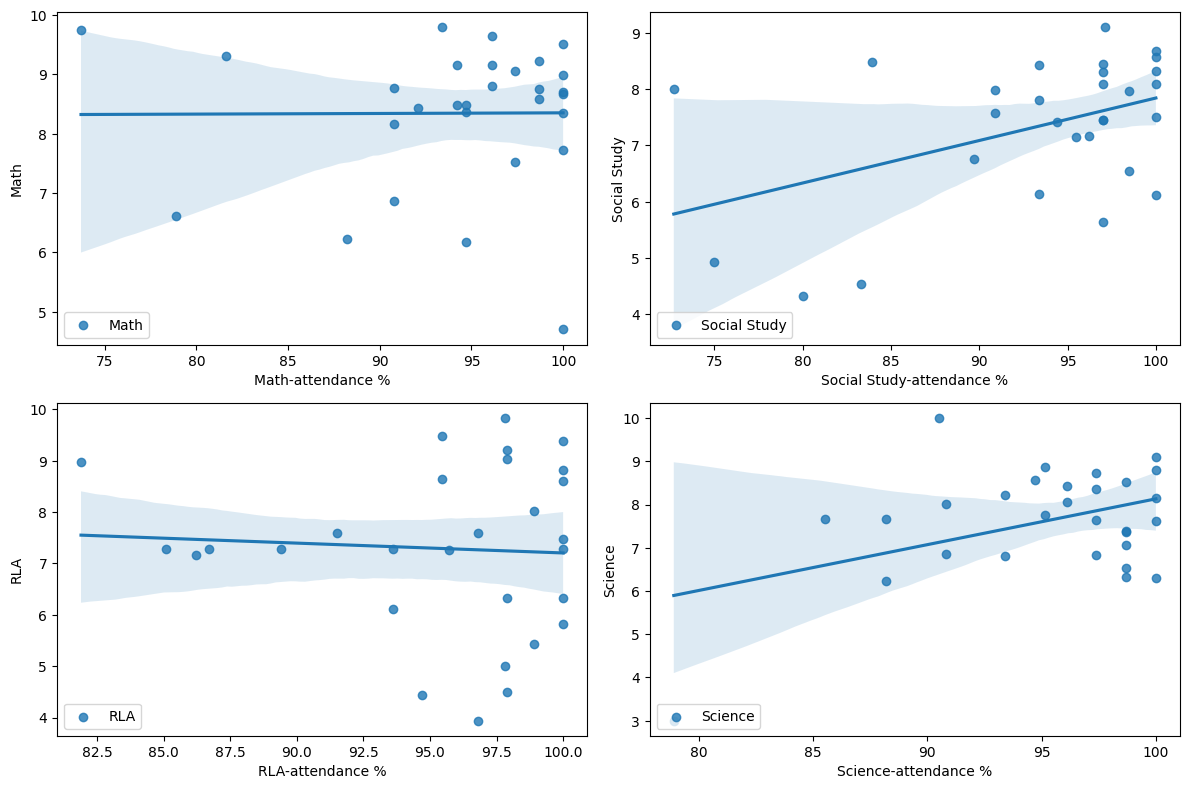

In [7]:
plt.figure(figsize=(12, 8))
label_list = ['Math', 'Social Study', 'RLA', 'Science']

for idx, sub in enumerate(sub_list):
    plt.subplot(2, 2, idx+1)
    sns.regplot(x='att_'+sub, y='avg_'+sub, data=df_att, ci = 95, label = label_list[idx])
    plt.xlabel(label_list[idx]+ '-attendance %')
    plt.ylabel(label_list[idx])
    plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()


**Insights** There is a linear correlation between attendance and module performance, with a stronger correlation observed in Social Studies and Science.

In [8]:
df_con = pd.read_csv('./data/confidence.csv', index_col = 0)
df_con = df_con.dropna()
df_melted = pd.melt(df_con, var_name='subject_confidence', value_name='confidence_score')
df_melted['subject'] = df_melted['subject_confidence'].apply(lambda x: x.split('_')[2])  # Math, RLA, etc.
df_melted['before_after'] = df_melted['subject_confidence'].apply(lambda x: 'Before' if 'bef' in x else 'After')
df_con.head()

,confidence_bef_math,confidence_bef_rla,confidence_bef_sci,confidence_bef_ss,confidence_aft_math,confidence_aft_rla,confidence_aft_sci,confidence_aft_ss
0,2.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0
1,3.0,2.0,1.0,1.0,4.0,4.0,3.0,5.0
2,3.0,2.0,2.0,1.0,5.0,4.0,4.0,5.0
5,5.0,5.0,4.0,1.0,5.0,5.0,4.0,4.0
6,1.0,3.0,1.0,1.0,3.0,3.0,3.0,4.0


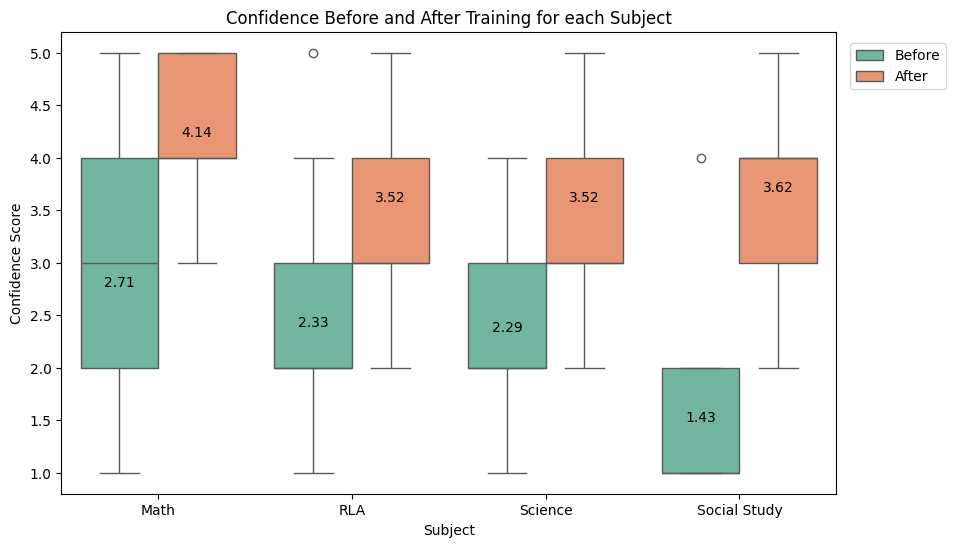

In [9]:
plt.figure(figsize=(10, 6))
ax=sns.boxplot(data=df_melted, x='subject', y='confidence_score', hue='before_after', palette="Set2")
for i, subject in enumerate(df_melted['subject'].unique()):

    median_before = df_melted[(df_melted['subject'] == subject) & (df_melted['before_after'] == 'Before')]['confidence_score'].mean()
    median_after = df_melted[(df_melted['subject'] == subject) & (df_melted['before_after'] == 'After')]['confidence_score'].mean()
    

    ax.text(i - 0.2, median_before+0.1, f'{median_before:.2f}', color='black', ha="center", va="center")
    ax.text(i + 0.2, median_after+0.1, f'{median_after:.2f}', color='black', ha="center", va="center")


plt.title('Confidence Before and After Training for each Subject')
plt.ylabel('Confidence Score')
plt.xlabel('Subject')
plt.xticks([0,1,2,3],labels = ['Math', 'RLA', 'Science', 'Social Study'])
plt.legend(loc = 'upper right', bbox_to_anchor=(1.15,0.99))
plt.show()